# Project 3: Credit Card Default Detection

**Data Description:**

**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. 

**X6** = September, 2015, **X11** =April, 2015.

**-1** = pay one month ahead; **0** = pay on time; **1** = delay 1 month.

**X12 - X17**: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015; **X17** = amount of bill statementApril, 2015. 

**X18 - X23**: Amount of previous payment

**X18** = amount paid in September, 2015; **X23** = amount paid in April, 2015.

**Y**: A binary response of whether the customer is fraud (1) or not (0).

This is a real problem to classify multi-feature data into two groups.

**1. Load the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print (train.shape)
print (test.shape)

(25000, 25)
(5000, 24)


In [3]:
train.columns

Index(['id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [4]:
train.iloc[0:10,6:12]

,X6,X7,X8,X9,X10,X11
0,0,0,0,0,0,0
1,0,0,0,2,0,0
2,0,0,0,0,0,0
3,1,-2,-2,-1,0,0
4,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,2
6,0,-1,-1,-1,0,-1
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,-2,-2,-2,-2,-2,-2


In [5]:
train.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [6]:
train.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**2. Distinguish categorical and continuous variables**

In [7]:
cat_v = []
con_v = []
for c in train.columns:
    if len(train[c].value_counts().index)<=15:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [8]:
print("The categorical variables: ", cat_v)
print("The continuous variables: ", con_v, "\n")

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 



**3. Basic feature analysis**

i. Check the pattern differences between the training data and testing data

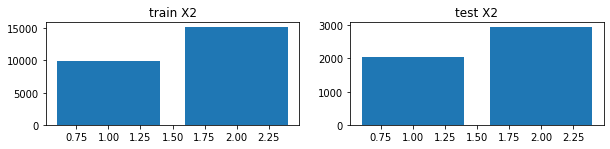

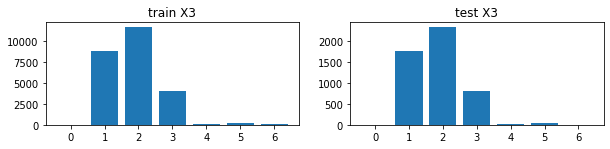

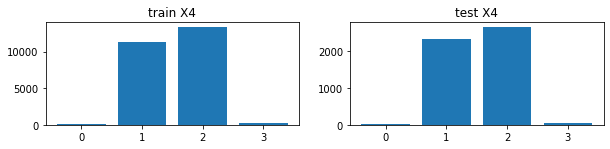

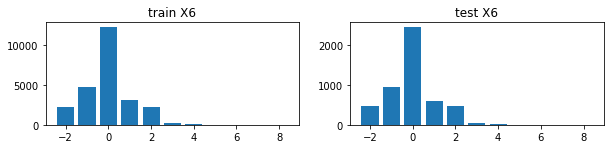

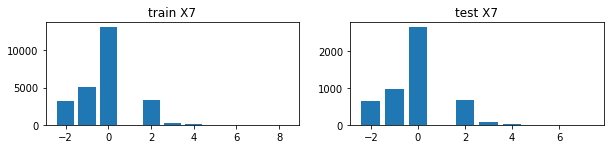

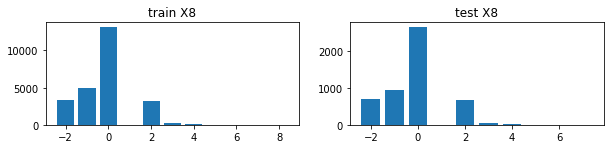

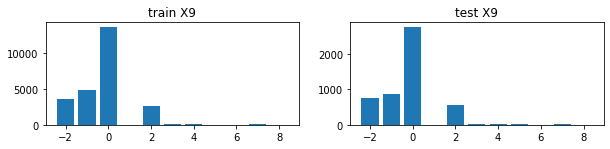

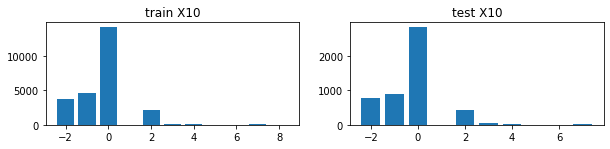

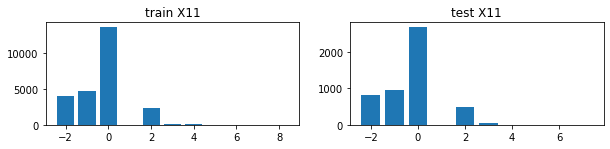

In [9]:
count=1
for i in range(len(cat_v)):
    fig = plt.figure(figsize=(10,20))
    plt.subplot(len(cat_v),2,count)
    plt.bar(train[cat_v[i]].value_counts().index, train[cat_v[i]].value_counts().values)
    plt.title("train "+cat_v[i])
    
    plt.subplot(len(cat_v),2,count+1)
    plt.bar(test[cat_v[i]].value_counts().index, test[cat_v[i]].value_counts().values)
    plt.title("test "+cat_v[i])
    count+=2

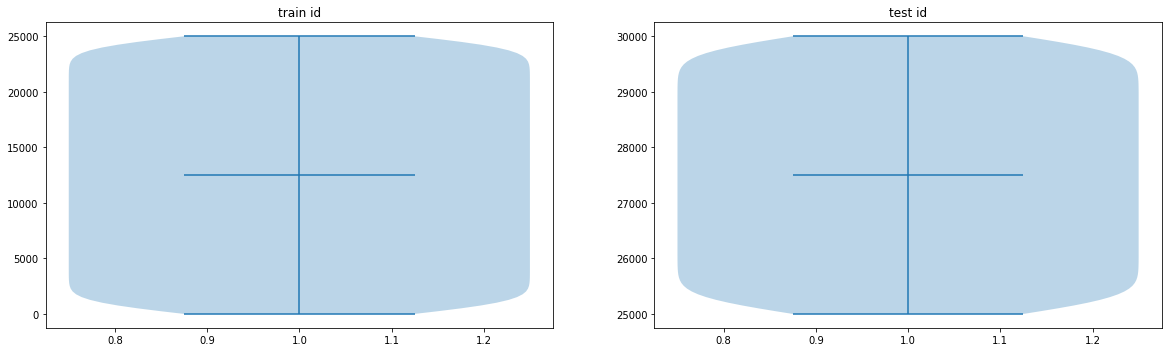

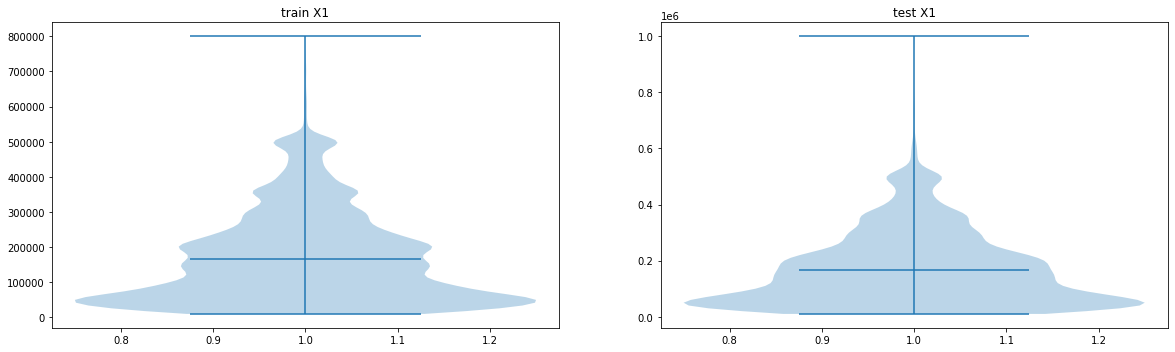

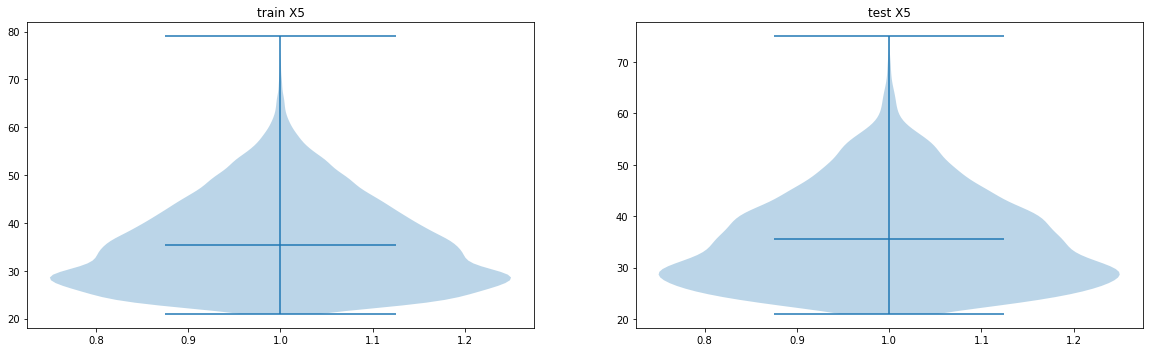

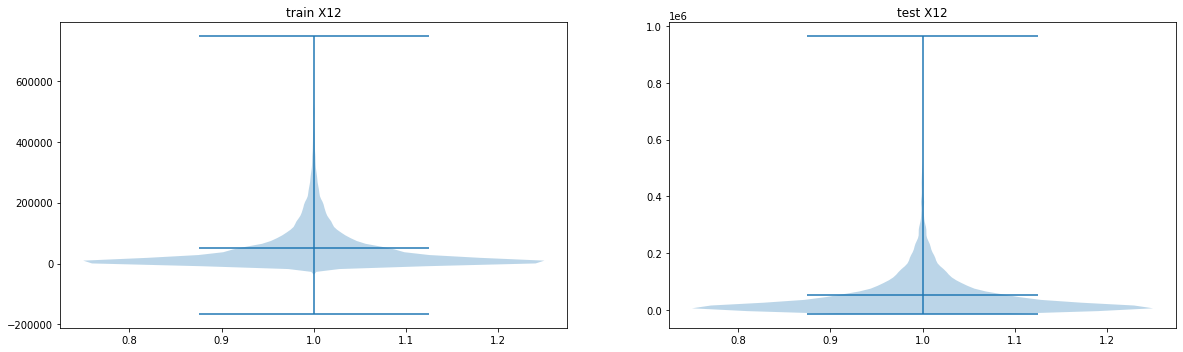

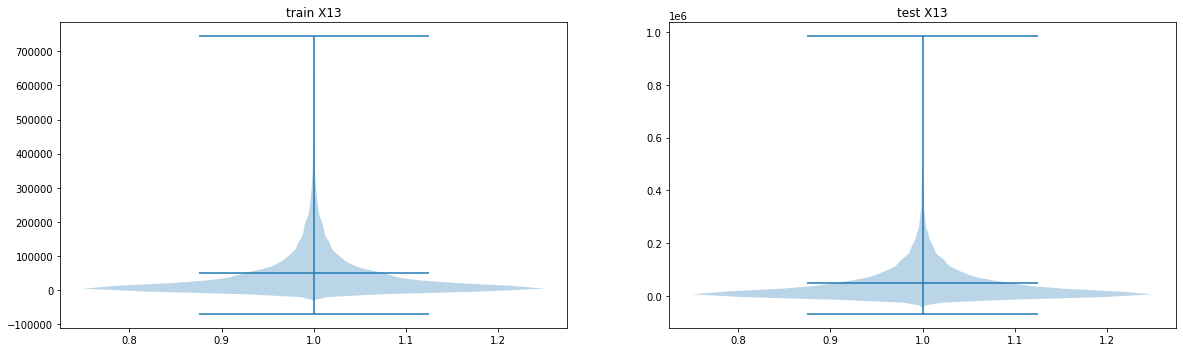

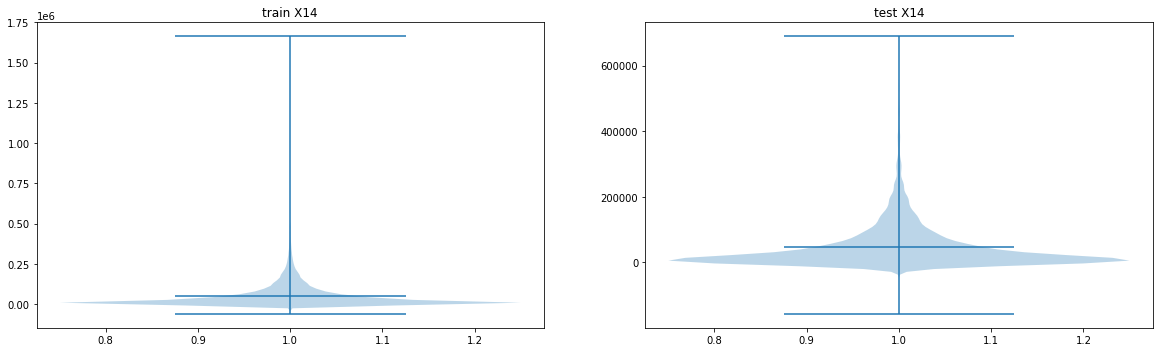

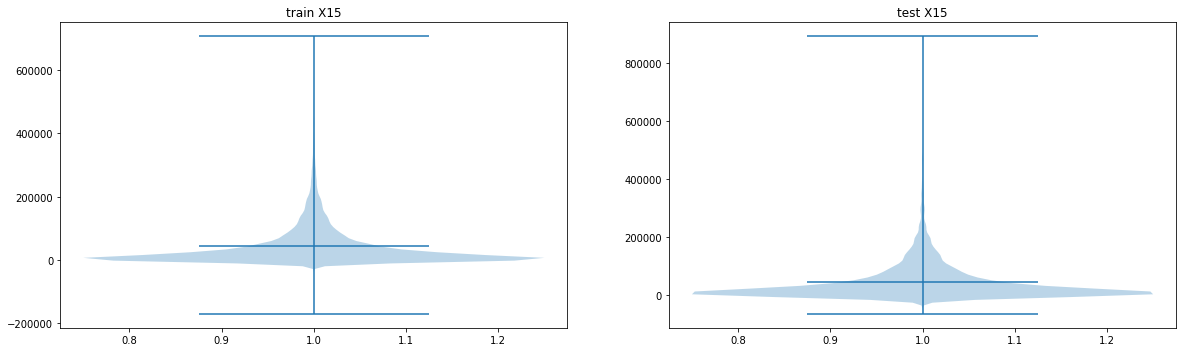

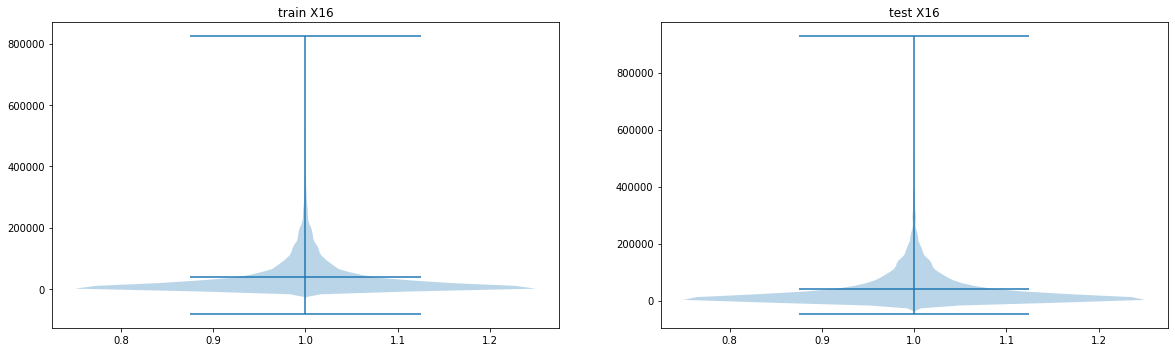

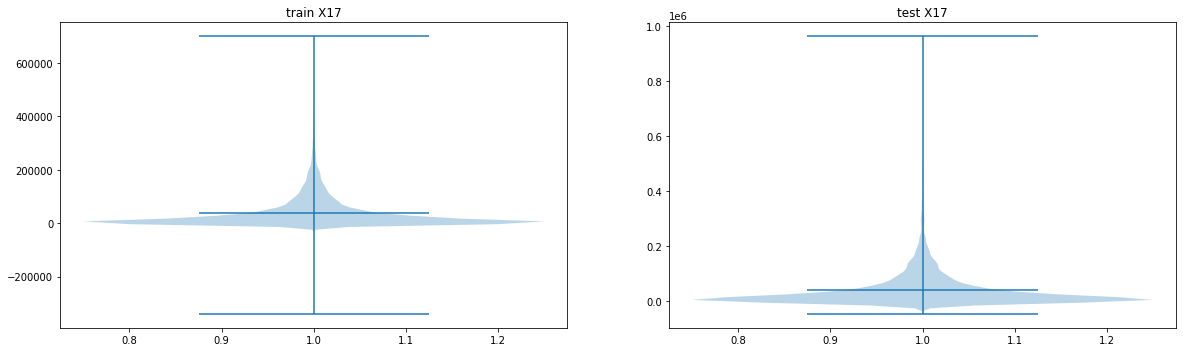

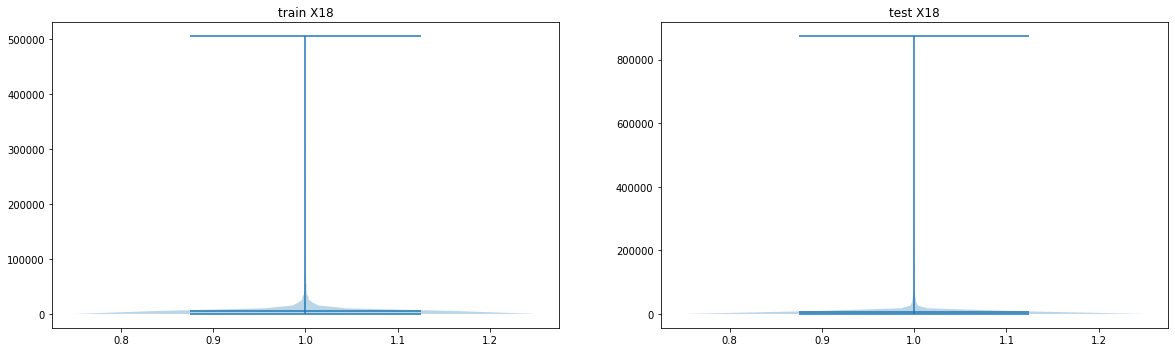

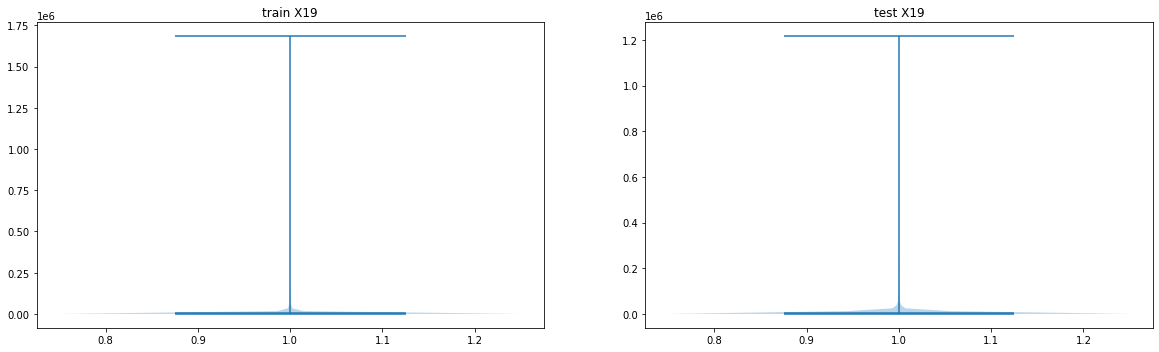

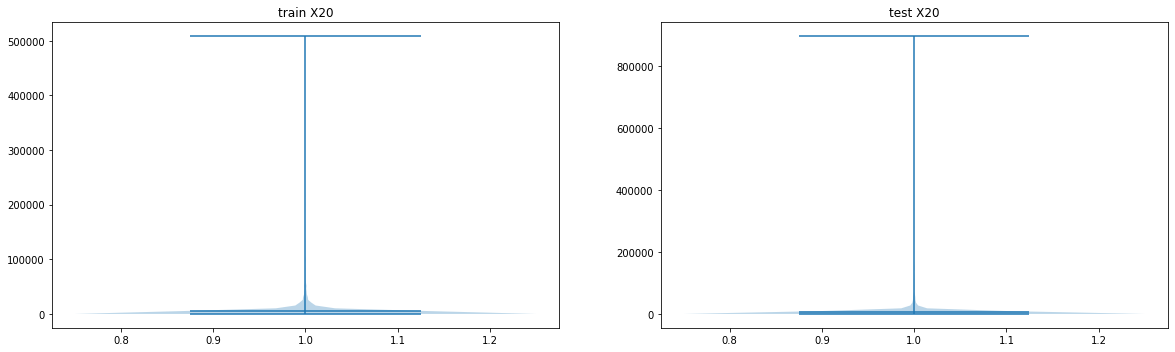

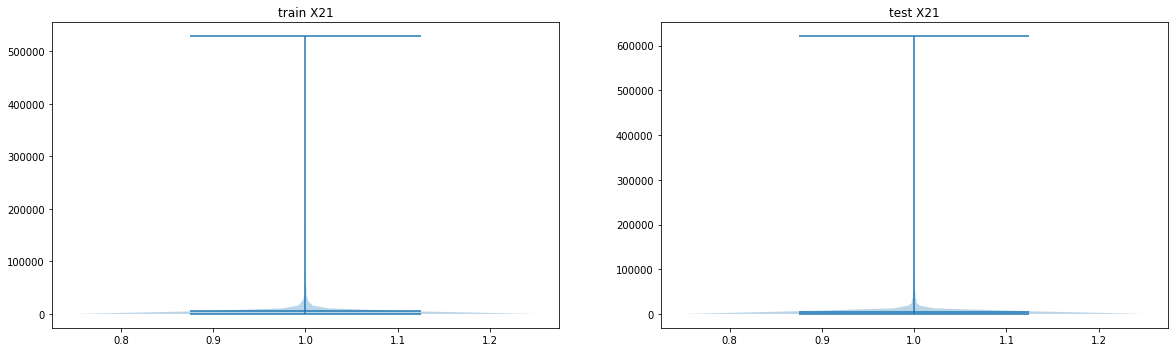

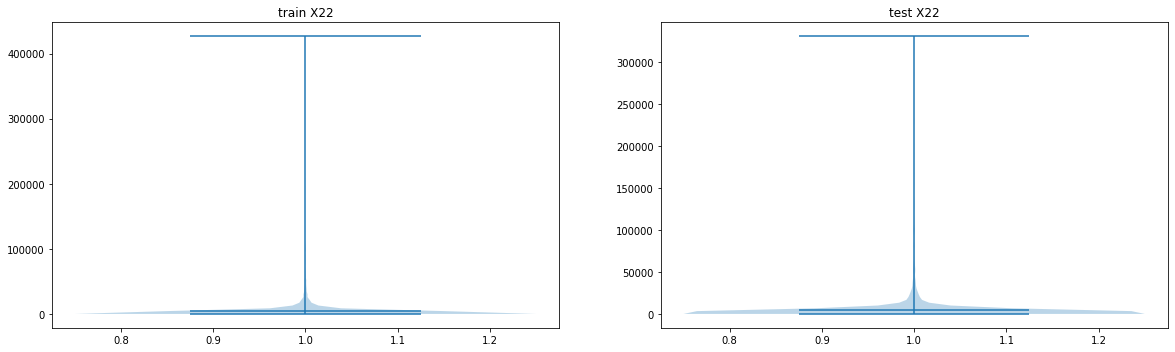

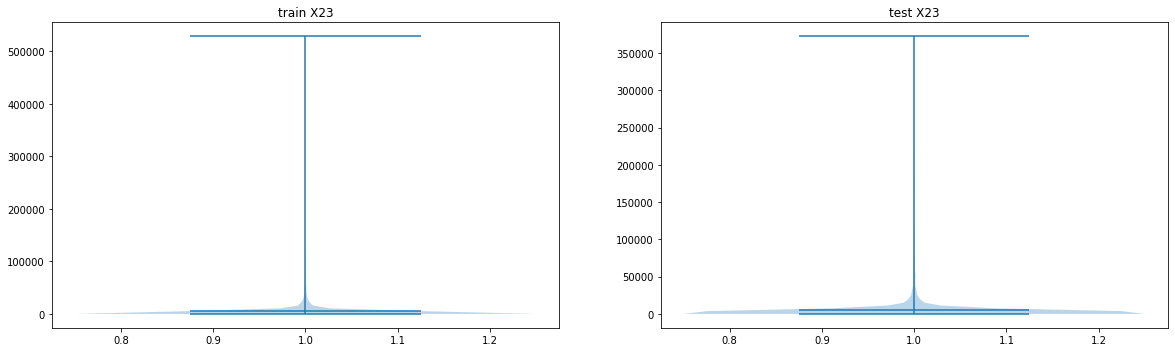

In [10]:
count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(train[con_v[i]],showmeans=True)
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(test[con_v[i]],showmeans=True)
    plt.title("test "+con_v[i])
    count+=2

ii. Check the if there are linear relationships between features

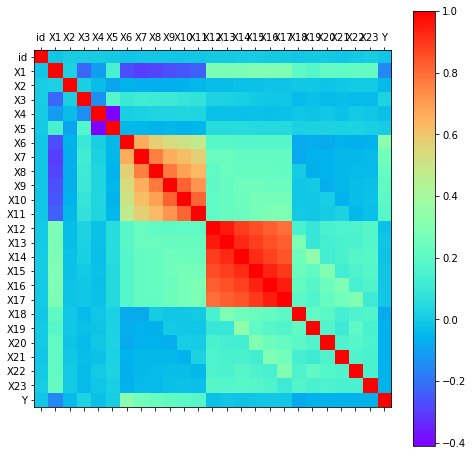

In [13]:
def plot_corr(df,size=8):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train)

iii. Check the pattern of the label

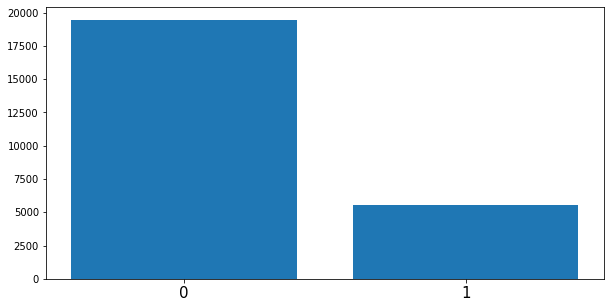

In [14]:
fig = plt.figure(figsize=(10,5))
plt.bar(train['Y'].value_counts().index, train['Y'].value_counts().values)
plt.xticks(train['Y'].value_counts().index,fontsize=15)
plt.show()

Method to deal with imbalanced data
1. Choose a good metrics: <br/>Confusion Matrix: recision/Recall/F1-score
2. Resampling Your Dataset:
  * You can add copies of instances from the under-represented class called over-sampling
  * use systematic algorithms to generate new instances: Synthetic Minority Over-sampling Technique
  * You can delete instances from the over-represented class, called under-sampling
  * imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Penalized Models: <br/>
比如在RandomForestClassifier里面调节class_weight={0:1,1:4}，LogisticRegression里调节 penalty, penalized-SVM
...

**4. Build a baseline model**

In [15]:
from sklearn.model_selection import train_test_split
Y = train['Y']
X = train.drop(['Y', 'id'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88      3923
          1       0.61      0.29      0.39      1077

avg / total       0.78      0.81      0.78      5000



**5. Basic parameter tuning: Grid Searching**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [18]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values
            , Y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7849784266421913, total=  23.0s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7879350329356679, total=  23.2s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7892216662606812, total=  23.3s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.796294672615707, total=  23.7s
[CV] class_weigh

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   50.8s


[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7875521374258675, total= 1.1min
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7994420597275301, total= 1.1min
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7912948121641707, total= 1.1min
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7893253098892669, total= 1.2min
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7915163006740252, total= 1.3min
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.0min


[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7864104454616362, total= 2.0min
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.8003312822411144, total= 2.0min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7907194534495195, total= 2.0min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7856082102446402, total=  27.7s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.8001025294020728, total=  29.5s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7946685797727129, total=  

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.0min


[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7886749021366795, total=  29.0s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7934296980035783, total=  28.8s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7929680238774701, total= 1.9min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.7886426813823442, total= 2.1min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.8021966762713671, total= 2.4min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.7923979167321618, to

[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 12.3min remaining:  1.4min


[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7935790113243714, total= 4.3min
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7913859165496514, total= 4.4min
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7944119053745253, total= 3.5min


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.7min finished


In [19]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_) 

Best score: 0.794
Best parameters set: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}
Scores: [mean: 0.78987, std: 0.00375, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 100}, mean: 0.79183, std: 0.00407, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 300}, mean: 0.79185, std: 0.00476, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 500}, mean: 0.79250, std: 0.00501, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 100}, mean: 0.79382, std: 0.00463, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 300}, mean: 0.79431, std: 0.00521, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}]


/Users/xrli/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


**6. Model Ensemble**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression (class_weight = {0:1, 1:3})
# results from your gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.00) [Random_Forest]
Accuracy: 0.71 (+/- 0.00) [KNN]
Accuracy: 0.71 (+/- 0.05) [Logistic]


/Users/xrli/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/xrli/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.78 (+/- 0.01) [Ensemble]


/Users/xrli/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**7. Generate the final submission**

In [21]:
eclf.fit(X, Y)
y = pd.DataFrame(eclf.predict(test.drop(['id'],axis=1)), columns=['y'])
predict_data = pd.concat([y, test['id']], axis =1)
predict_data.to_csv('Submmission.csv', index=False)

/Users/xrli/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
